In [61]:
#importing used libraries
import csv
import re
from functools import reduce
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this aux function reads the CSV file and returns the data in a Python dictionary
def get_data_csv(link):
    collection = []
    with open(link, 'r', encoding="mbcs") as f:
        for line in csv.DictReader(f):
            collection.append(line)
        return collection

# construct a dict containing all sunshine data
sunDict = {}
years = []
toAppend = ""
for i in range (1996, 2021):
    years.append(i)
    toAppend = "sunshine" + str(i) + ".csv"
    sunDict[toAppend] = (pd.DataFrame(get_data_csv(toAppend))).drop_duplicates().rename(columns ={"Salary paid" : "Salary Paid"}).rename(columns ={"Salary Paid " : "Salary Paid"})
    #if you're wondering why this line is so long, it's because the sunshine lists changed their key formats randomly.
    #slight fix, there were duplicate entries in the dataframes. Added command to drop them.

print(years)

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [65]:
sunDict['sunshine2020.csv'].head()

,Sector,Last name,First name,Salary Paid,Taxable benefits,Employer,Job title,Calendar year
0,Colleges,Aarts,Cheri,"$113,586.57",$71.01,Fanshawe College Of Applied Arts and Technology,Professor,2020
1,Colleges,Aaslepp,Drew,"$113,685.85",$117.26,Humber College Institute Of Technology and Adv...,Professor,2020
2,Colleges,Abba,Corinne,"$102,214.17",$117.36,George Brown College Of Applied Arts and Techn...,Librarian,2020
3,Colleges,Abbott,Brian,"$102,855.46",$117.36,Conestoga College Institute Of Technology and ...,Professor,2020
4,Colleges,Abbott,Kathleen,"$160,854.89",$326.33,George Brown College Of Applied Arts and Techn...,"Associate Dean, Centre for Continuous Learning",2020


In [66]:
#1. Find mean Salary of each year.
#2. Graph means.

sunMeans = [] #sunMeans is ordered 1996 to 2020

for i in sunDict:
    sunMeans.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).mean())



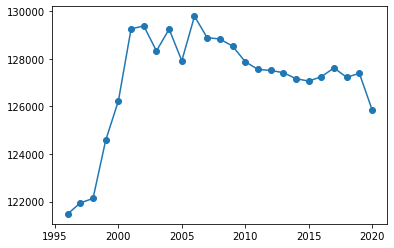

In [67]:
plt.plot(years, sunMeans, marker = 'o')

In [68]:
#Above plot is interesting.
#Could learn more by seperating each year into quartiles and then taking the mean of each quartile over the years.

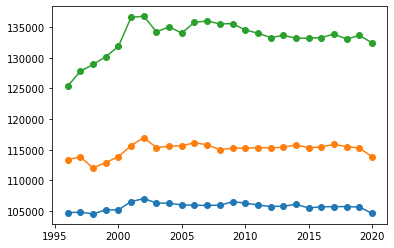

In [69]:
#3. Seperate each year into quartiles
#4. Find mean salary of each quartile in each year
#5. Generate graphs to understand results.
#       -Second graphs are each quartile graphed individually.

sunQ1 = []
sunQ2 = []
sunQ3 = []


for i in sunDict:
    sunQ1.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.25])[0.25])
    sunQ2.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.5])[0.5])
    sunQ3.append((sunDict[i])['Salary Paid'].replace('[\$,]', '', regex=True).astype(float).quantile([0.75])[0.75])
plt.plot(years, sunQ1, marker = 'o', color = 'tab:blue')
plt.plot(years, sunQ2, marker = 'o', color = 'tab:orange')
plt.plot(years, sunQ3, marker = 'o',color = 'tab:green')

First graph is all quartiles on one chart. Lost a lot of detail due to the scale of the graph. Graph each quartile individually.

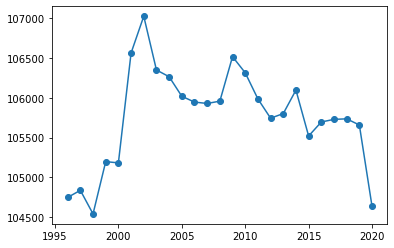

In [70]:
plt.plot(years, sunQ1, marker = 'o', color = 'tab:blue')

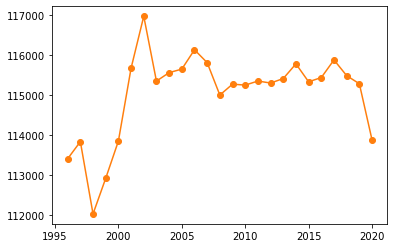

In [71]:
plt.plot(years, sunQ2, marker = 'o', color = 'tab:orange')

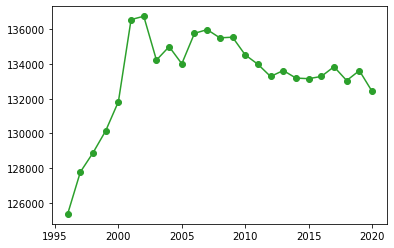

In [72]:
plt.plot(years, sunQ3, marker = 'o', color = 'tab:green')

Second set of graphs provides better detail.

Mean income grew significantly in each quartile between 1998 and 2002.

Mean income dropped significantly in quartiles 1 and 2 from 2019 to 2020. Not a significant drop in quartile 3.

The graphs could be influenced by the amount of people in each year. Consider also graphing based on a percentage of the top earner's income. 

More detail could be obtained by splitting the graphs into deciles instead of quartiles, but that would be more difficult to analyze. I'll consider it as a stretch goal.

Doing a scatterplot of salaries with seaborn might be useful for further insights